In [1]:
%matplotlib notebook

import numpy as np
import torch
import joblib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from env.fetch_reach_mod import FetchReachMod
from network import DynamicsModel

In [2]:
state_dim = 10
ac_dim = 4
traj_length = 100

traj_emp = np.zeros((traj_length, state_dim))
traj_pred = np.zeros((traj_length, state_dim))
actions = np.zeros((traj_length-1, ac_dim))

env = FetchReachMod()

obs = env.reset()
traj_emp[0, :] = obs["observation"]
traj_pred[0, :] = obs["observation"]

for ts in range(traj_length-1):
    action = env.action_space.sample()
    actions[ts, :] = action
    obs, _, _, _ = env.step(action)
    traj_emp[ts+1,:] = obs["observation"]

In [3]:
device = "cuda"
model = DynamicsModel(state_dim, ac_dim).to(device)
state_scaler, state_diff_scaler, model_dict, _ = joblib.load("1000_100_results.pkl")
model.load_state_dict(model_dict)
model.eval()

DynamicsModel(
  (model): Sequential(
    (0): Linear(in_features=14, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [4]:
for ts in range(traj_length-1):
    state_in = torch.tensor(state_scaler.transform(traj_pred[ts,:].reshape(1,-1)), dtype=torch.float32).to(device)
    action_in = torch.tensor(actions[ts,:], dtype=torch.float32).to(device).view(1,-1)
    pred_ds = model(state_in, action_in)
    pred_ds_unnorm = state_diff_scaler.inverse_transform(pred_ds.cpu().data.numpy()).reshape(-1)
    traj_pred[ts+1,:] = traj_pred[ts,:] + pred_ds_unnorm

<IPython.core.display.Javascript object>


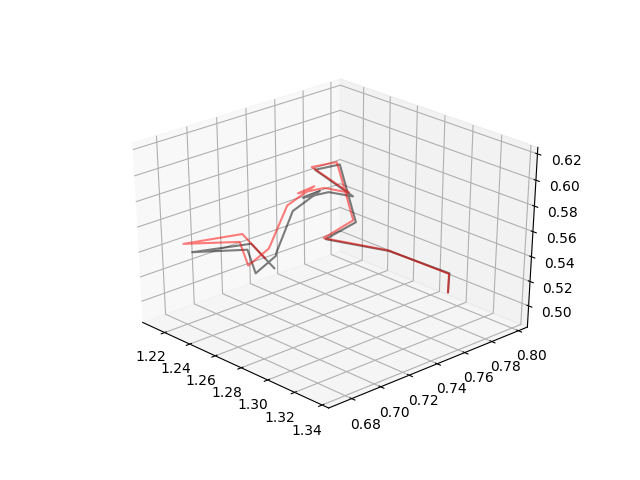

(0.4852534426283982, 0.6220541821351234)

In [17]:
num_steps = 20

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(traj_emp[:num_steps,0], traj_emp[:num_steps,1], traj_emp[:num_steps,2], c=[0,0,0,0.5])
ax.plot(traj_pred[:num_steps,0], traj_pred[:num_steps,1], traj_pred[:num_steps,2], c=[1,0,0,0.5])

temp = np.concatenate((traj_emp[:num_steps, :], traj_pred[:num_steps, :]), axis=0)
X = temp[:, 0]; Y = temp[:, 1]; Z = temp[:, 2]
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

random start points:

In [2]:
state_dim = 10
ac_dim = 4
traj_length = 100

traj_emp = np.zeros((traj_length, state_dim))
traj_pred = np.zeros((traj_length, state_dim))
actions = np.zeros((traj_length-1, ac_dim))

possible_start_states = joblib.load("../starting_states.pkl")
env = FetchReachMod(random_start=True, possible_start_states=possible_start_states)

obs = env.reset()
traj_emp[0, :] = obs["observation"]
traj_pred[0, :] = obs["observation"]

for ts in range(traj_length-1):
    action = env.action_space.sample()
    actions[ts, :] = action
    obs, _, _, _ = env.step(action)
    traj_emp[ts+1,:] = obs["observation"]

In [3]:
device = "cuda"
model = DynamicsModel(state_dim, ac_dim).to(device)
state_scaler, state_diff_scaler, model_dict, _ = joblib.load("rand_start1000_100_results.pkl")
model.load_state_dict(model_dict)
model.eval()

DynamicsModel(
  (model): Sequential(
    (0): Linear(in_features=14, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [4]:
for ts in range(traj_length-1):
    state_in = torch.tensor(state_scaler.transform(traj_pred[ts,:].reshape(1,-1)), dtype=torch.float32).to(device)
    action_in = torch.tensor(actions[ts,:], dtype=torch.float32).to(device).view(1,-1)
    pred_ds = model(state_in, action_in)
    pred_ds_unnorm = state_diff_scaler.inverse_transform(pred_ds.cpu().data.numpy()).reshape(-1)
    traj_pred[ts+1,:] = traj_pred[ts,:] + pred_ds_unnorm

<IPython.core.display.Javascript object>


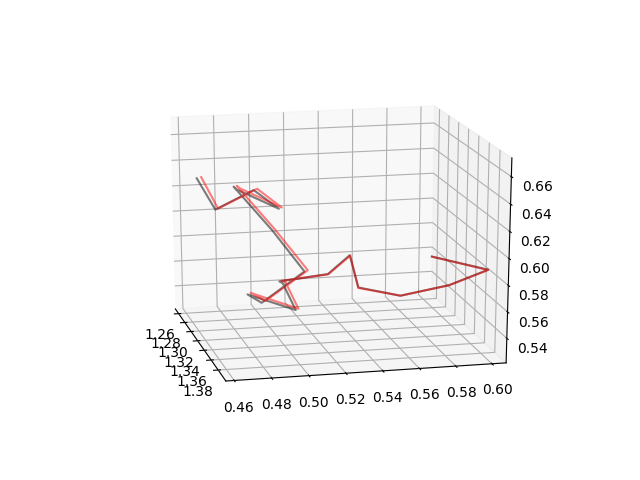

(0.5242465180721881, 0.6704691022099857)

In [5]:
num_steps = 20

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(traj_emp[:num_steps,0], traj_emp[:num_steps,1], traj_emp[:num_steps,2], c=[0,0,0,0.5])
ax.plot(traj_pred[:num_steps,0], traj_pred[:num_steps,1], traj_pred[:num_steps,2], c=[1,0,0,0.5])

temp = np.concatenate((traj_emp[:num_steps, :], traj_pred[:num_steps, :]), axis=0)
X = temp[:, 0]; Y = temp[:, 1]; Z = temp[:, 2]
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)